In [ ]:
!wget -P dataset http://205.174.165.80/CICDataset/CICMalAnal2017/Dataset/CSVS/Ransomware-CSVs.zip
!wget -P dataset http://205.174.165.80/CICDataset/CICMalAnal2017/Dataset/CSVS/Benign-CSVs.zip
!wget -P dataset http://205.174.165.80/CICDataset/CICMalAnal2017/Dataset/CSVS/Adware-CSVs.zip
!wget -P dataset http://205.174.165.80/CICDataset/CICMalAnal2017/Dataset/CSVS/SMSmalware-CSVs.zip
!wget -P dataset http://205.174.165.80/CICDataset/CICMalAnal2017/Dataset/CSVS/Scareware-CSVs.zip

In [ ]:
!unzip /content/dataset/Adware-CSVs.zip -d /content/dataset
!unzip /content/dataset/Benign-CSVs.zip -d /content/dataset
!unzip /content/dataset/Ransomware-CSVs.zip -d /content/dataset
!unzip /content/dataset/SMSmalware-CSVs.zip -d /content/dataset
!unzip /content/dataset/Scareware-CSVs.zip -d /content/dataset

In [1]:
import pandas as pd
import glob
import os
import numpy as np
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
import matplotlib

df1= pd.read_csv('/content/dataset/Ransomware/Charger/08_28_2017-ra-charger-sophos-00357b0e208c20df3182d54cb2ba15bf.pcap_ISCX.csv')
df2 = pd.read_csv('/content/dataset/Ransomware/Jisut/08_21_2017-ra-jisut-eset-01147ee72ad07cb9c1416b9963e56f99.pcap_ISCX.csv')

df1


,Flow ID,Source IP,Source Port,Destination IP,Destination Port,Protocol,Timestamp,Flow Duration,Total Fwd Packets,Total Backward Packets,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,157.240.18.10-10.42.0.211-443-48478-6,10.42.0.211,48478,157.240.18.10,443,6,28/08/2017 02:19:52,54295,1,2,...,32,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,RANSOMWARE_CHARGER
1,10.42.0.211-31.13.71.1-42881-443-6,10.42.0.211,42881,31.13.71.1,443,6,28/08/2017 02:19:52,216598,2,0,...,32,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,RANSOMWARE_CHARGER
2,10.42.0.211-31.13.71.1-42881-443-6,10.42.0.211,42881,31.13.71.1,443,6,28/08/2017 02:19:53,922042,2,0,...,32,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,RANSOMWARE_CHARGER
3,10.42.0.211-31.13.71.1-42881-443-6,10.42.0.211,42881,31.13.71.1,443,6,28/08/2017 02:19:55,3679063,2,0,...,32,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,RANSOMWARE_CHARGER
4,180.149.138.197-10.42.0.211-80-37257-6,10.42.0.211,37257,180.149.138.197,80,6,28/08/2017 02:20:10,502269,3,4,...,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,RANSOMWARE_CHARGER
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4766,10.42.0.211-10.42.0.1-14573-53-17,10.42.0.211,14573,10.42.0.1,53,17,28/08/2017 03:21:41,25544,1,1,...,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,RANSOMWARE_CHARGER
4767,10.42.0.211-10.42.0.1-55568-53-17,10.42.0.211,55568,10.42.0.1,53,17,28/08/2017 03:11:17,259230,1,1,...,32,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,RANSOMWARE_CHARGER
4768,199.16.156.43-10.42.0.211-443-58046-6,10.42.0.211,58046,199.16.156.43,443,6,28/08/2017 02:30:42,11188914,9,7,...,32,213392.0,0.0,213392.0,213392.0,10975522.0,0.0,10975522.0,10975522.0,RANSOMWARE_CHARGER
4769,157.55.235.173-10.42.0.211-40001-60774-17,10.42.0.211,60774,157.55.235.173,40001,17,28/08/2017 02:55:30,98533,1,1,...,32,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,RANSOMWARE_CHARGER


In [3]:

# Specify the parent directory
parent_dir = '/content/dataset/Benign'

# Get a list of all subdirectories
subdirs = [os.path.join(parent_dir, d) for d in os.listdir(parent_dir) if os.path.isdir(os.path.join(parent_dir, d))]

# List to hold dataframes
df_list = []

for subdir in subdirs:
    # Get a list of all csv files in the subdirectory
    csv_files = glob.glob(os.path.join(subdir, '*.csv'))

    for filename in csv_files:
        df_list.append(pd.read_csv(filename))

# Concatenate all dataframes in the list
merged_df = pd.concat(df_list, ignore_index=True)

# Write the output to a new CSV file
merged_df.to_csv('benign.csv', index=False)


In [2]:
df1 = pd.read_csv("benign.csv")

In [3]:
print("----------------------------------NORMAL---------------------------------")
df1

----------------------------------NORMAL---------------------------------


,Flow ID,Source IP,Source Port,Destination IP,Destination Port,Protocol,Timestamp,Flow Duration,Total Fwd Packets,Total Backward Packets,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,172.217.6.238-10.42.0.42-443-54555-6,10.42.0.42,54555,172.217.6.238,443,6,04/07/2017 05:16:53,271396,7,9,...,32,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN
1,206.126.112.141-10.42.0.42-443-53937-6,10.42.0.42,53937,206.126.112.141,443,6,04/07/2017 05:16:53,343614,131,540,...,32,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN
2,172.217.10.42-10.42.0.42-443-33710-6,10.42.0.42,33710,172.217.10.42,443,6,04/07/2017 05:16:56,37143,1,1,...,32,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN
3,172.217.10.42-10.42.0.42-443-48244-6,10.42.0.42,48244,172.217.10.42,443,6,04/07/2017 05:17:05,36474,1,1,...,32,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN
4,157.56.52.23-10.42.0.42-40033-40935-6,10.42.0.42,40935,157.56.52.23,40033,6,04/07/2017 05:16:53,22765967,3,2,...,32,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1205510,10.42.0.151-10.42.0.1-51900-53-17,10.42.0.151,51900,10.42.0.1,53,17,04/08/2017 05:02:30,884,1,1,...,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN
1205511,10.42.0.151-10.42.0.1-53275-53-17,10.42.0.151,53275,10.42.0.1,53,17,04/08/2017 05:04:58,24377,1,1,...,32,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN
1205512,10.42.0.151-10.42.0.1-12495-53-17,10.42.0.151,12495,10.42.0.1,53,17,04/08/2017 05:07:15,846251,1,1,...,32,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN
1205513,172.217.6.200-10.42.0.151-443-37670-6,172.217.6.200,443,10.42.0.151,37670,6,04/08/2017 05:04:27,2531,1,1,...,32,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN


In [9]:
# Specify the parent directories
parent_dirs = ['/content/dataset/Adware', '/content/dataset/Ransomware', '/content/dataset/SMSmalware', '/content/dataset/Scareware']

# List to hold dataframes
df_list = []

for parent_dir in parent_dirs:
    # Get a list of all subdirectories
    subdirs = [os.path.join(parent_dir, d) for d in os.listdir(parent_dir) if os.path.isdir(os.path.join(parent_dir, d))]

    for subdir in subdirs:
        # Get a list of all csv files in the subdirectory
        csv_files = glob.glob(os.path.join(subdir, '*.csv'))

        for filename in csv_files:
            df_list.append(pd.read_csv(filename))

# Concatenate all dataframes in the list
merged_df = pd.concat(df_list, ignore_index=True)

# Write the output to a new CSV file
merged_df.to_csv('ransomware.csv', index=False)


In [4]:
df2 = pd.read_csv('ransomware.csv', low_memory=False)

In [5]:
print("--------------------------------------MALWARE---------------------------------------------")
df2

--------------------------------------MALWARE---------------------------------------------


,Flow ID,Source IP,Source Port,Destination IP,Destination Port,Protocol,Timestamp,Flow Duration,Total Fwd Packets,Total Backward Packets,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,172.217.7.10-10.42.0.151-443-38523-6,10.42.0.151,38523.0,172.217.7.10,443.0,6.0,13/06/2017 04:18:24,36964.0,1.0,1.0,...,32.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,ADWARE_EWIND
1,172.217.7.10-10.42.0.151-443-38523-6,172.217.7.10,443.0,10.42.0.151,38523.0,6.0,13/06/2017 04:18:24,247189.0,2.0,0.0,...,32.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,ADWARE_EWIND
2,172.217.7.10-10.42.0.151-443-45766-6,10.42.0.151,45766.0,172.217.7.10,443.0,6.0,13/06/2017 04:18:32,37132.0,1.0,1.0,...,32.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,ADWARE_EWIND
3,172.217.7.10-10.42.0.151-443-59109-6,10.42.0.151,59109.0,172.217.7.10,443.0,6.0,13/06/2017 04:18:38,36912.0,1.0,1.0,...,32.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,ADWARE_EWIND
4,10.42.0.151-31.13.71.37-52689-443-6,31.13.71.37,443.0,10.42.0.151,52689.0,6.0,13/06/2017 04:18:40,46.0,2.0,0.0,...,32.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,ADWARE_EWIND
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1411059,216.58.217.99-10.42.0.151-80-36089-6,216.58.217.99,80.0,10.42.0.151,36089.0,6.0,30/06/2017 11:16:05,18839.0,1.0,1.0,...,32.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,SCAREWARE_PENETHO
1411060,10.42.0.151-10.42.0.1-52052-53-17,10.42.0.151,52052.0,10.42.0.1,53.0,17.0,30/06/2017 11:12:47,31917.0,1.0,1.0,...,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,SCAREWARE_PENETHO
1411061,10.42.0.151-106.39.169.66-60125-80-6,10.42.0.151,60125.0,106.39.169.66,80.0,6.0,30/06/2017 11:07:18,261530.0,1.0,1.0,...,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,SCAREWARE_PENETHO
1411062,172.217.12.170-10.42.0.151-443-53209-6,10.42.0.151,53209.0,172.217.12.170,443.0,6.0,30/06/2017 11:26:03,238.0,2.0,0.0,...,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,SCAREWARE_PENETHO


In [6]:
counts1 = df1[' Label'].value_counts()
counts2 = df2[' Label'].value_counts()
print(counts1)
print(counts2)

BENIGN    1205515
Name:  Label, dtype: int64
ADWARE_GOOLIGAN              93772
ADWARE_FEIWO                 56632
SCAREWARE_ANDROIDDEFENDER    56440
RANSOMWARE_SVPENG            54161
RANSOMWARE_PORNDROID         46082
SCAREWARE_FAKEAPPAL          44563
RANSOMWARE_KOLER             44555
SMSMALWARE_NANDROBOX         44517
ADWARE_EWIND                 43374
SCAREWARE_AVFORANDROID       42448
SCAREWARE_AVPASS             40776
SCAREWARE_FAKEAV             40089
RANSOMWARE_RANSOMBO          39859
SMSMALWARE_PLANKTON          39765
ADWARE_DOWGIN                39682
RANSOMWARE_CHARGER           39551
ADWARE_SHUANET               39271
ADWARE_KEMOGE                38771
RANSOMWARE_SIMPLOCKER        36340
ADWARE_YOUMI                 36035
SCAREWARE_FAKEAPP            34676
SMSMALWARE_BIIGE             33678
SMSMALWARE_SMSSNIFFER        33618
SCAREWARE_FAKETAOBAO         33299
RANSOMWARE_WANNALOCKER       32701
ADWARE_KOODOUS               32547
ADWARE_MOBIDASH              31034
SCAREWARE_

In [7]:
benign_rows = df2[df2[' Label'] == 'BENIGN']
benign_rows

,Flow ID,Source IP,Source Port,Destination IP,Destination Port,Protocol,Timestamp,Flow Duration,Total Fwd Packets,Total Backward Packets,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
812640,10.42.0.211-10.42.0.1-41381-53-17,10.42.0.211,41381.0,10.42.0.1,53.0,17.0,29/08/2017 10:21:54,31892.0,1.0,1.0,...,32.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN
812641,202.77.129.161-10.42.0.211-443-41285-6,10.42.0.211,41285.0,202.77.129.161,443.0,6.0,29/08/2017 10:22:39,449.0,2.0,0.0,...,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN
812642,10.42.0.211-10.42.0.1-56846-53-17,10.42.0.211,56846.0,10.42.0.1,53.0,17.0,29/08/2017 10:29:40,103247.0,1.0,1.0,...,40.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN
812643,203.205.191.22-10.42.0.211-443-56968-6,10.42.0.211,56968.0,203.205.191.22,443.0,6.0,29/08/2017 10:03:25,419304.0,8.0,8.0,...,32.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN
812644,10.42.0.211-10.42.0.1-12779-53-17,10.42.0.211,12779.0,10.42.0.1,53.0,17.0,29/08/2017 10:26:45,61539.0,1.0,1.0,...,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1293641,10.42.0.151-10.42.0.1-27924-53-17,10.42.0.151,27924.0,10.42.0.1,53.0,17.0,28/08/2017 12:17:20,871054.0,1.0,1.0,...,40.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN
1293642,10.42.0.151-14.29.93.254-38206-80-6,14.29.93.254,80.0,10.42.0.151,38206.0,6.0,28/08/2017 12:19:17,5695.0,1.0,1.0,...,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN
1293643,10.42.0.151-10.42.0.1-8793-53-17,10.42.0.151,8793.0,10.42.0.1,53.0,17.0,28/08/2017 12:18:57,517476.0,1.0,1.0,...,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN
1293644,10.42.0.151-10.42.0.1-47497-53-17,10.42.0.151,47497.0,10.42.0.1,53.0,17.0,28/08/2017 12:22:43,1806.0,1.0,1.0,...,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN


In [8]:
df_malware = df2.copy()
df_malware[' Label'] = df_malware[' Label'].apply(lambda x: 'MALWARE' if x != 'BENIGN' else x)

In [9]:
counts = df_malware[' Label'].value_counts()
print(counts)
print(df_malware.shape[0])
print(df1.shape[0])

MALWARE    1406369
BENIGN        4695
Name:  Label, dtype: int64
1411064
1205515


In [10]:
df_walnor = pd.concat([df_malware, df1])
counts = df_walnor[' Label'].value_counts()
print(counts)

MALWARE    1406369
BENIGN     1210210
Name:  Label, dtype: int64


In [11]:
df_sampled = df_walnor.groupby(' Label').apply(lambda x: x.sample(frac=0.1))
df_sampled

Flow ID    Source IP  \
 Label                                                                
BENIGN  595812    10.42.0.211-119.146.74.48-55056-80-6  10.42.0.211   
        734327  10.42.0.151-115.239.210.141-57176-80-6  10.42.0.151   
        285962  10.42.0.151-36.110.213.174-35640-443-6  10.42.0.151   
        588893   172.217.1.163-10.42.0.151-443-44586-6  10.42.0.151   
        455949  10.42.0.151-98.137.201.232-42494-443-6  10.42.0.151   
...                                                ...          ...   
MALWARE 147887    10.42.0.211-72.21.207.79-47182-443-6  10.42.0.211   
        422766       10.42.0.211-10.42.0.1-10637-53-17  10.42.0.211   
        251202    10.42.0.211-119.146.74.48-52643-80-6  10.42.0.211   
        57271    198.11.188.75-10.42.0.211-443-33717-6  10.42.0.211   
        381033   131.253.61.64-10.42.0.151-443-49535-6  10.42.0.151   

                 Source Port   Destination IP   Destination Port   Protocol  \
 Label                                                                        
BENIGN  595812       55056.0    119.146.74.48               80.0        6.0   
        734327       57176.0  115.239.210.141               80.0        6.0   
        285962       35640.0   36.110.213.174              443.0        6.0   
        588893       44586.0    172.217.1.163              443.0        6.0   
        455949       42494.0   98.137.201.232              443.0        6.0   
...                      ...              ...                ...        ...   
MALWARE 147887       47182.0     72.21.207.79              443.0        6.0   
        422766       10637.0        10.42.0.1               53.0       17.0   
        251202       52643.0    119.146.74.48               80.0        6.0   
        57271        33717.0    198.11.188.75              443.0        6.0   
        381033       49535.0    131.253.61.64              443.0        6.0   

                          Timestamp   Flow Duration   Total Fwd Packets  \
 Label                                                                    
BENIGN  595812  22/06/2017 09:06:50      23121104.0                 2.0   
        734327  21/06/2017 11:12:36       1712181.0                 2.0   
        285962  07/07/2017 07:04:34       1837723.0                10.0   
        588893  19/06/2017 12:16:20       1202751.0                 2.0   
        455949  21/07/2017 12:58:44      69755686.0                 3.0   
...                             ...             ...                 ...   
MALWARE 147887  15/06/2017 02:01:24      71113512.0                29.0   
        422766  14/06/2017 03:25:19           858.0                 1.0   
        251202  14/06/2017 04:58:01      20488808.0                 8.0   
        57271   14/06/2017 07:13:17      66550691.0                19.0   
        381033  14/06/2017 04:56:22        413309.0                10.0   

                 Total Backward Packets  ...   min_seg_size_forward  \
 Label                                   ...                          
BENIGN  595812                      0.0  ...                   20.0   
        734327                      0.0  ...                   20.0   
        285962                      8.0  ...                   20.0   
        588893                      0.0  ...                   32.0   
        455949                      0.0  ...                   32.0   
...                                 ...  ...                    ...   
MALWARE 147887                     17.0  ...                   20.0   
        422766                      1.0  ...                   32.0   
        251202                     11.0  ...                   20.0   
        57271                      41.0  ...                   20.0   
        381033                     11.0  ...                   20.0   

                 Active Mean   Active Std   Active Max   Active Min  \
 Label                                                                
BENIGN  595812  0.000000e+00       0.0000          0.

In [30]:
df = df_sampled.reset_index(drop=True)
counts = df[' Label'].value_counts()
print(counts)

MALWARE    140637
BENIGN     121021
Name:  Label, dtype: int64


In [31]:
#Standardization preprocessing
features = df.dtypes[df.dtypes != 'object'].index
df[features] = df[features].apply(
    lambda x: (x - x.mean()) / (x.std()))

df.dtypes.value_counts()

float64    75
object     10
dtype: int64

In [32]:
#transformation
labelencoder = LabelEncoder()
df.iloc[:, -1] = labelencoder.fit_transform(df.iloc[:, -1])

#Fill empty values by 0
df = df.fillna(0)
print('_________________DATA PREPROCESSING_________________')
df

<ipython-input-32-2097512ee7f8>:3: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df.iloc[:, -1] = labelencoder.fit_transform(df.iloc[:, -1])


_________________DATA PREPROCESSING_________________


,Flow ID,Source IP,Source Port,Destination IP,Destination Port,Protocol,Timestamp,Flow Duration,Total Fwd Packets,Total Backward Packets,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,10.42.0.211-119.146.74.48-55056-80-6,10.42.0.211,0.880511,119.146.74.48,-0.371600,-0.019774,22/06/2017 09:06:50,0.554142,-0.096609,-0.078880,...,-0.006133,-0.170962,-0.065377,-0.162047,-0.162613,-0.281986,-0.111408,-0.287099,-0.271002,0
1,10.42.0.151-115.239.210.141-57176-80-6,10.42.0.151,0.995696,115.239.210.141,-0.371600,-0.019774,21/06/2017 11:12:36,-0.415097,-0.096609,-0.078880,...,-0.006133,-0.170962,-0.065377,-0.162047,-0.162613,-0.281986,-0.111408,-0.287099,-0.271002,0
2,10.42.0.151-36.110.213.174-35640-443-6,10.42.0.151,-0.174415,36.110.213.174,-0.347419,-0.019774,07/07/2017 07:04:34,-0.409413,0.024990,-0.025453,...,-0.006133,-0.170962,-0.065377,-0.162047,-0.162613,-0.281986,-0.111408,-0.287099,-0.271002,0
3,172.217.1.163-10.42.0.151-443-44586-6,10.42.0.151,0.311646,172.217.1.163,-0.347419,-0.019774,19/06/2017 12:16:20,-0.438160,-0.096609,-0.078880,...,-0.006123,-0.170962,-0.065377,-0.162047,-0.162613,-0.281986,-0.111408,-0.287099,-0.271002,0
4,10.42.0.151-98.137.201.232-42494-443-6,10.42.0.151,0.197982,98.137.201.232,-0.347419,-0.019774,21/07/2017 12:58:44,2.665414,-0.081409,-0.078880,...,-0.006123,-0.123317,-0.065377,-0.122595,-0.111552,4.445602,-0.111408,4.214473,4.571677,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261653,10.42.0.211-72.21.207.79-47182-443-6,10.42.0.211,0.452694,72.21.207.79,-0.347419,-0.019774,15/06/2017 02:01:24,2.726887,0.313788,0.034653,...,-0.006133,-0.033298,0.407898,0.249926,-0.095706,0.512564,0.077985,0.486273,0.462330,1
261654,10.42.0.211-10.42.0.1-10637-53-17,10.42.0.211,-1.532898,10.42.0.1,-0.373398,0.065681,14/06/2017 03:25:19,-0.492573,-0.111808,-0.072202,...,-0.006123,-0.170962,-0.065377,-0.162047,-0.162613,-0.281986,-0.111408,-0.287099,-0.271002,1
261655,10.42.0.211-119.146.74.48-52643-80-6,10.42.0.211,0.749406,119.146.74.48,-0.371600,-0.019774,14/06/2017 04:58:01,0.434971,-0.005409,-0.005418,...,-0.006133,-0.170962,-0.065377,-0.162047,-0.162613,-0.281986,-0.111408,-0.287099,-0.271002,1
261656,198.11.188.75-10.42.0.211-443-33717-6,10.42.0.211,-0.278897,198.11.188.75,-0.347419,-0.019774,14/06/2017 07:13:17,2.520316,0.161789,0.194934,...,-0.006133,7.083384,-0.065377,5.844827,7.611969,3.781994,-0.111408,3.582590,3.891913,1


In [33]:
df.dtypes.value_counts()

float64    75
object      9
int64       1
dtype: int64

In [34]:
df.dtypes[df.dtypes == 'object']

Flow ID               object
 Source IP            object
 Destination IP       object
 Timestamp            object
 Flow IAT Min         object
 Packet Length Std    object
 CWE Flag Count       object
 Down/Up Ratio        object
Fwd Avg Bytes/Bulk    object
dtype: object

In [35]:
print(df.columns)

Index(['Flow ID', ' Source IP', ' Source Port', ' Destination IP',
       ' Destination Port', ' Protocol', ' Timestamp', ' Flow Duration',
       ' Total Fwd Packets', ' Total Backward Packets',
       'Total Length of Fwd Packets', ' Total Length of Bwd Packets',
       ' Fwd Packet Length Max', ' Fwd Packet Length Min',
       ' Fwd Packet Length Mean', ' Fwd Packet Length Std',
       'Bwd Packet Length Max', ' Bwd Packet Length Min',
       ' Bwd Packet Length Mean', ' Bwd Packet Length Std', 'Flow Bytes/s',
       ' Flow Packets/s', ' Flow IAT Mean', ' Flow IAT Std', ' Flow IAT Max',
       ' Flow IAT Min', 'Fwd IAT Total', ' Fwd IAT Mean', ' Fwd IAT Std',
       ' Fwd IAT Max', ' Fwd IAT Min', 'Bwd IAT Total', ' Bwd IAT Mean',
       ' Bwd IAT Std', ' Bwd IAT Max', ' Bwd IAT Min', 'Fwd PSH Flags',
       ' Bwd PSH Flags', ' Fwd URG Flags', ' Bwd URG Flags',
       ' Fwd Header Length', ' Bwd Header Length', 'Fwd Packets/s',
       ' Bwd Packets/s', ' Min Packet Length', ' Max Pa

In [37]:
df = df.drop(['Flow ID',' Source IP',
              ' Destination IP',' Timestamp',' Flow IAT Min',
              ' Packet Length Std', ' CWE Flag Count', ' Down/Up Ratio','Fwd Avg Bytes/Bulk' ], axis=1)

In [38]:
df.dtypes.value_counts()

float64    75
int64       1
dtype: int64

In [39]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score, precision_recall_fscore_support
from sklearn.metrics import f1_score,roc_auc_score
import xgboost as xgb
from xgboost import plot_importance

X = df.drop([' Label'], axis=1)
y = df.iloc[:, -1].values.reshape(-1,1)
y = np.ravel(y)
y = y.astype('float')

X_train, X_test, y_train, y_test = train_test_split(X,y, train_size = 0.8, test_size = 0.2, random_state = 0,stratify = y)



In [40]:
print(X_train.dtypes)

 Source Port          float64
 Destination Port     float64
 Protocol             float64
 Flow Duration        float64
 Total Fwd Packets    float64
                       ...   
 Active Min           float64
Idle Mean             float64
 Idle Std             float64
 Idle Max             float64
 Idle Min             float64
Length: 75, dtype: object


In [41]:
X_train = pd.get_dummies(X_train)

In [42]:
#feature selection
from sklearn.feature_selection import mutual_info_classif
MIscore = mutual_info_classif(X_train, y_train)

#feature_list1: a list of tuples, each containing a feature MI score and the corresponding feature name in descending order of importance
feature_list1 = sorted(zip(map(lambda x: round(x, 4), MIscore), features), reverse=True)
sum = 0
fs = []
for i in range(0, len(feature_list1)):
    sum += feature_list1[i][0] #total sum of feature MI score
    fs.append(feature_list1[i][1])

#feature_list2: list of features and their scores, sorted by normalized importance.
feature_list2 = sorted(zip(map(lambda x: round(x,4), MIscore/sum), features), reverse=True)
sum2 = 0
fs = []
for i in range(0, len(feature_list2)):
    sum2 += feature_list2[i][0]
    fs.append(feature_list2[i][1])
    if sum2 >= 0.9:
        break

X_fs = df[fs].values

print('________DATA TRANSFORMATION & FEATURE SELECTION________')
print(X_fs)

________DATA TRANSFORMATION & FEATURE SELECTION________
[[-0.55006933 -0.49483784 -0.55006519 ... -0.10107761 -0.12308241
  -0.21225871]
 [-0.55006933 -0.49483784 -0.55006519 ... -0.10107761 -0.12308241
  -0.21225871]
 [ 1.46606858  0.5893833   1.46607449 ... -0.10068898 -0.12308241
  -0.21225871]
 ...
 [ 1.64019134  1.62346091  1.64019741 ... -0.10102968 -0.12308241
  -0.21225871]
 [ 2.03311653  1.35397751  2.03312293 ... -0.10102261 -0.12308241
  -0.21225871]
 [ 2.79692188  0.74418761  2.79692896 ... -0.09870164 -0.12308241
  -0.21225871]]


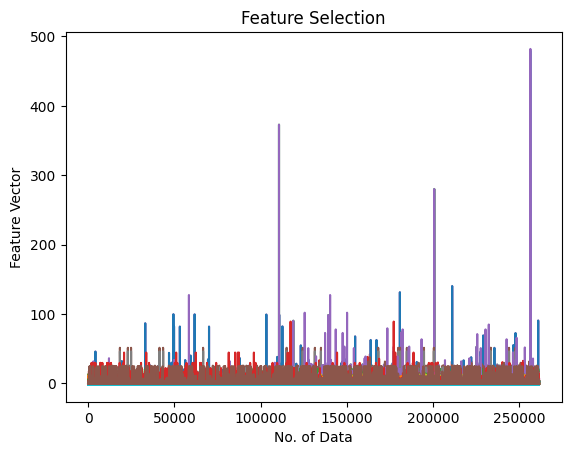

In [43]:
import matplotlib.pyplot as plt
plt.plot(X_fs)
plt.xlabel("No. of Data")
plt.ylabel("Feature Vector")
plt.title("Feature Selection")
plt.show()

Accuracy of XGBoost: 0.5960024459221891
Precision of XGBoost: 0.6007159436560946
Recall of XGBoost: 0.5960024459221891
F1-score of XGBoost: 0.5710855064877174
              precision    recall  f1-score   support

         0.0       0.61      0.34      0.44     24204
         1.0       0.59      0.81      0.68     28128

    accuracy                           0.60     52332
   macro avg       0.60      0.58      0.56     52332
weighted avg       0.60      0.60      0.57     52332



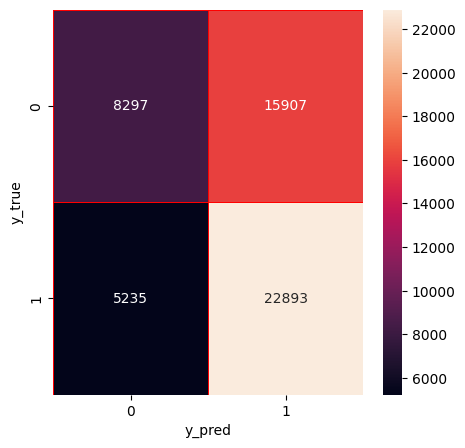

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X_fs,y, train_size = 0.8, test_size = 0.2, random_state = 0, stratify = y)

import xgboost as xgb

xg = xgb.XGBClassifier(n_estimators = 10)
xg.fit(X_train,y_train)
xg_score = xg.score(X_test,y_test)
y_predict = xg.predict(X_test)

y_true = y_test

'''
Resr=[]
print('---XGBoost Classifier-Prediction Result---')
for ii in range(0,len(y_predict)):
    if(y_predict[ii]==0):
        Resr.append("Normal")
    else:
        Resr.append("Anormal")
print(Resr)

y_true = y_test

Resr1=[]
print('.---Test Label---')
for ii in range(0,len(y_true)):
    if(y_true[ii]==0):
        Resr1.append("Normal")
    else:
        Resr1.append("Anormal")
print(Resr1)
'''
print('Accuracy of XGBoost: '+ str(xg_score))
precision, recall, fscore, none = precision_recall_fscore_support(y_true, y_predict, average = 'weighted')
print('Precision of XGBoost: '+(str(precision)))
print('Recall of XGBoost: '+(str(recall)))
print('F1-score of XGBoost: '+(str(fscore)))

print(classification_report(y_true,y_predict))
cm = confusion_matrix(y_true,y_predict)
f,ax = plt.subplots(figsize=(5,5))
sns.heatmap(cm,annot = True, linewidth = 0.5,linecolor = "red",fmt = ".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()